In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 1) 데이터: CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# 정규화
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [3]:
# 2) VGG16 모델

from tensorflow import keras
from tensorflow.keras import layers

model_vgg = keras.Sequential([
    layers.Input(shape=(32, 32, 3)),

    # block1: 64 x2
    layers.Conv2D(64, 3, padding="same"), layers.ReLU(),
    layers.Conv2D(64, 3, padding="same"), layers.ReLU(),
    layers.MaxPooling2D(),

    # block2: 128 x2
    layers.Conv2D(128, 3, padding="same"), layers.ReLU(),
    layers.Conv2D(128, 3, padding="same"), layers.ReLU(),
    layers.MaxPooling2D(),

    # block3: 256 x3
    layers.Conv2D(256, 3, padding="same"), layers.ReLU(),
    layers.Conv2D(256, 3, padding="same"), layers.ReLU(),
    layers.Conv2D(256, 3, padding="same"), layers.ReLU(),
    layers.MaxPooling2D(),

    # block4: 512 x3
    layers.Conv2D(512, 3, padding="same"), layers.ReLU(),
    layers.Conv2D(512, 3, padding="same"), layers.ReLU(),
    layers.Conv2D(512, 3, padding="same"), layers.ReLU(),
    layers.MaxPooling2D(),

    # block5: 512 x3
    layers.Conv2D(512, 3, padding="same"), layers.ReLU(),
    layers.Conv2D(512, 3, padding="same"), layers.ReLU(),
    layers.Conv2D(512, 3, padding="same"), layers.ReLU(),
    layers.MaxPooling2D(),

    # classifier
    layers.Flatten(),
    layers.Dense(512), layers.ReLU(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
], name="VGG16_NoBN")

model_vgg.summary()


Model: "VGG16_NoBN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_9 (ReLU)                  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,80

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 14,982,474 (57.15 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model_bn = keras.Sequential([
    layers.Input(shape=(32, 32, 3)),

    # block1: 64 x2
    layers.Conv2D(64, 3, padding="same"), layers.BatchNormalization(), layers.ReLU(),
    layers.Conv2D(64, 3, padding="same"), layers.BatchNormalization(), layers.ReLU(),
    layers.MaxPooling2D(),

    # block2: 128 x2
    layers.Conv2D(128, 3, padding="same"), layers.BatchNormalization(), layers.ReLU(),
    layers.Conv2D(128, 3, padding="same"), layers.BatchNormalization(), layers.ReLU(),
    layers.MaxPooling2D(),

    # block3: 256 x3
    layers.Conv2D(256, 3, padding="same"), layers.BatchNormalization(), layers.ReLU(),
    layers.Conv2D(256, 3, padding="same"), layers.BatchNormalization(), layers.ReLU(),
    layers.Conv2D(256, 3, padding="same"), layers.BatchNormalization(), layers.ReLU(),
    layers.MaxPooling2D(),

    # block4: 512 x3
    layers.Conv2D(512, 3, padding="same"), layers.BatchNormalization(), layers.ReLU(),
    layers.Conv2D(512, 3, padding="same"), layers.BatchNormalization(), layers.ReLU(),
    layers.Conv2D(512, 3, padding="same"), layers.BatchNormalization(), layers.ReLU(),
    layers.MaxPooling2D(),

    # block5: 512 x3
    layers.Conv2D(512, 3, padding="same"), layers.BatchNormalization(), layers.ReLU(),
    layers.Conv2D(512, 3, padding="same"), layers.BatchNormalization(), layers.ReLU(),
    layers.Conv2D(512, 3, padding="same"), layers.BatchNormalization(), layers.ReLU(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(512), layers.BatchNormalization(), layers.ReLU(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
], name="VGG16_BN")

model_bn.summary()


Model: "VGG16_BN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_14 (ReLU)                 │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_15 (ReLU)                 │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_16 (ReLU)                 │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_17 (ReLU)                 │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_18 (ReLU)                 │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_19 (ReLU)                 │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 256)      │         1,02

 Total params: 15,001,418 (57.23 MB)

 Trainable params: 14,991,946 (57.19 MB)

 Non-trainable params: 9,472 (37.00 KB)

In [5]:
# 3) 학습 설정
EPOCHS = 20
BATCH  = 128
OPT    = keras.optimizers.Adam()

model_vgg.compile(optimizer=OPT,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

history_vgg = model_vgg.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH,
    verbose=1
)


Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 112ms/step - accuracy: 0.1003 - loss: 2.3033 - val_accuracy: 0.1038 - val_loss: 2.3026
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.1034 - loss: 2.3027 - val_accuracy: 0.0950 - val_loss: 2.3027
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 80ms/step - accuracy: 0.0999 - loss: 2.3028 - val_accuracy: 0.0970 - val_loss: 2.3026
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 80ms/step - accuracy: 0.0978 - loss: 2.3026 - val_accuracy: 0.0970 - val_loss: 2.3027
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 80ms/step - accuracy: 0.1001 - loss: 2.3026 - val_accuracy: 0.0970 - val_loss: 2.3027
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 80ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.0950 - val_loss: 2.3028
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 80ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.0976 - val_loss: 2.3028
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 80ms/step - accuracy: 0.0968 - loss: 2.3027 -

In [6]:
# 4) BatchNorm 버전 학습
model_bn.compile(optimizer=keras.optimizers.Adam(),
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

history_bn = model_bn.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH,
    verbose=1
)


Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 119ms/step - accuracy: 0.3148 - loss: 1.9356 - val_accuracy: 0.1778 - val_loss: 3.6400
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.6166 - loss: 1.0660 - val_accuracy: 0.6146 - val_loss: 1.1839
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 87ms/step - accuracy: 0.7294 - loss: 0.7814 - val_accuracy: 0.6816 - val_loss: 1.0134
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 87ms/step - accuracy: 0.7891 - loss: 0.6157 - val_accuracy: 0.7282 - val_loss: 0.8478
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.8295 - loss: 0.5042 - val_accuracy: 0.6898 - val_loss: 1.0542
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.8659 - loss: 0.4029 - val_accuracy: 0.7446 - val_loss: 0.8684
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.8877 - loss: 0.3325 - val_accuracy: 0.7446 - val_loss: 0.8783
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.9083 - loss: 0.2735 -

In [7]:
# 5) 테스트 성능 비교
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(x_test, y_test, verbose=0)
test_loss_bn,  test_acc_bn  = model_bn.evaluate(x_test, y_test, verbose=0)

print(f"[Test] VGG16 (no BN): acc={test_acc_vgg:.4f}, loss={test_loss_vgg:.4f}")
print(f"[Test] VGG16 (+ BN):  acc={test_acc_bn:.4f},  loss={test_loss_bn:.4f}")


[Test] VGG16 (no BN): acc=0.1000, loss=2.3026
[Test] VGG16 (+ BN):  acc=0.8054,  loss=0.9882


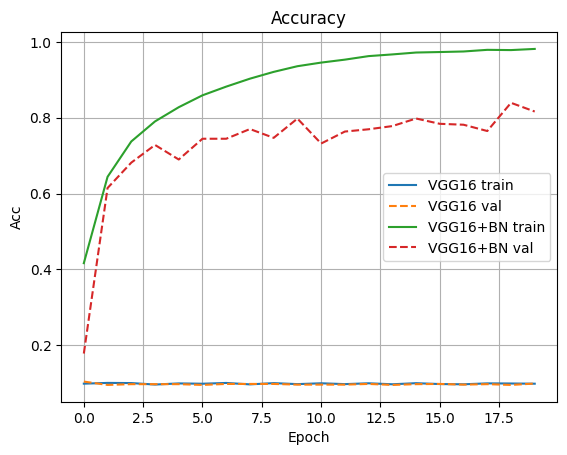

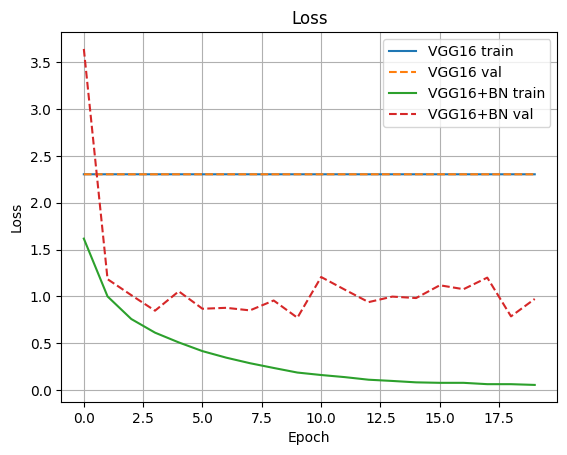

In [8]:
# 6) 학습 곡선 (Accuracy / Loss)
h1 = history_vgg.history
h2 = history_bn.history

# Accuracy
plt.figure()
plt.plot(h1["accuracy"], label="VGG16 train")
plt.plot(h1["val_accuracy"], label="VGG16 val", linestyle="--")
plt.plot(h2["accuracy"], label="VGG16+BN train")
plt.plot(h2["val_accuracy"], label="VGG16+BN val", linestyle="--")
plt.title("Accuracy")
plt.xlabel("Epoch"); plt.ylabel("Acc"); plt.legend(); plt.grid(True)
plt.show()

# Loss
plt.figure()
plt.plot(h1["loss"], label="VGG16 train")
plt.plot(h1["val_loss"], label="VGG16 val", linestyle="--")
plt.plot(h2["loss"], label="VGG16+BN train")
plt.plot(h2["val_loss"], label="VGG16+BN val", linestyle="--")
plt.title("Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid(True)
plt.show()
